# Bridges to Prosperity- Group 22 Final project

### Introduction

>The project seeks to establish a relationship between the Bridges to Prosperity (B2P) and the Global indicator datasets by combining them to various insights and metrics pertaining to the number of bridges constructed by the organization based on the demographic characteristics.

### Methodology

>The project uses two datasets, namely: the Bridges to Prosperity (B2P) and Global Indicator. The global indicator dataset contains information about the demographic aspects such as Human development index, percentage of rural population, etc for different countries. The information in this dataset is strictly limited to the year 2018. The B2P dataset consists of the projects undertaken by the B2P organization in various under-developed and developing countries. It describes the types of projects, the number of people impacted, project code and the stage in which the project is currently operating. After performing exploratory data analysis (EDA), I have munged both the datasets on the **Country** column to perform quantitative analysis by creating plots, histograms on the cleaned data.

Below is the table of contents for each section:
   
1. <a href="#1.-Load-flat-files">Load flat files</a>
2. <a href="#2.-Exploratory-Data-Analysis">Exploratory Data Analysis</a>
3. <a href="#3.-Data-Munging">Data Munging</a>
4. <a href="#4.-Conclusion">Coclusion</a>

## 1. Load flat files

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The bridges dataframe consists of 339 rows and 13 columns. The table shows the number of bridge projects undertaken by the Bridges to Prosperity (B2P) organization in across 20 countries around the globe. The bridges have helped in increasing people's income, accessibility and provided safe access to over 1.1 M people. For the analysis, I am going to consider only the 'completed' projects for the year 2018 and check for important stats related to the bridge projects. The metadata for columns is provided below:

>- **Country**- indicates the country in which the bridge project was undertaken
>- **Level 1 Government**-Highest government administrative level, in terms of boundaries
>- **Level 2 Government**-Second highest government administrative level, in terms of boundaries
>- **Stage**- stage in which the project is currently operating
>- **Individuals Directly Served**- conservative estimate of the number of people with safe access to critical destinations as a result of the footbridge at the site
>- **Project Type**-type of project such as developed by B2P staff, partnership with local government, built using volunteer and financial support, etc

The other columns are self explanatory.

In [17]:
bridges = pd.read_excel("C:\\Storage\\Study\\Masters\\Intro to Python\\Final Project\\Bridges Dataset.xls")

The global indicator dataframe consists of 209 rows and 6 columns. The table shows the information about rural population, rural poplation without access to road, human development index across many countries all around the globe. For the analysis, I am going to consider countries where B2P has completed projects in. The metadata for columns is provided below:

>- **Rural Access Index**- The Rural Access Index (RAI) is an indicator developed by the World Bank to measures the proportion of the rural population in a given geography who live within 2 km of an all-season road. It was originally developed in 2006, and the methodology was revised in 2016 to include spatial data and techniques. The RAI is a key indicator for B2P in its development of a strategy to address poverty caused by rural isolation on a global scale. 
>- **Rural % of Total Population**- A World Bank indicator noting the percent of the total population living in 
rural areas
>- **Total Rural Population**- A World Bank indicator noting the total estimated number of people living in 
rural areas
>- **Rural Population without Access**- The most recent published RAI value multiplied by the most recent published 
total rural population value
>- **Human Development Index**- The Human Development Index (HDI) is a summary measure developed by the United Nations Development Programme that indicates the average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions

The other columns are self explanatory.

In [18]:
global_indicator = pd.read_excel("C:\\Storage\\Study\\Masters\\Intro to Python\\Final Project\\Global Indicators Dataset.xls")

## 2. Exploratory Data Analysis

### 2.1 Global Indicators

We take a look at the first 5 rows of the dataset to understand the type of values in each column and get an overall understanding.

In [19]:
global_indicator.head()

,Country,Rural Access (Year Varies)\nIndex,Rural % of Total Population (2018),Total Rural Population (2018),"Rural Population without Access (2018 Population, Varying RAI Year)",Human Development Index (2019)
0,Afghanistan,22%,0.74505,27695286,21602323.08,0.49596
1,Albania,31%,0.39681,1137407,784810.83,0.791406
2,Algeria,59%,0.27371,11558343,4738920.63,0.758978
3,American Samoa,not available,0.12847,7126,not available,not available
4,Andorra,not available,0.11938,9193,not available,0.856781


Print the number of rows and columns in the dataset

In [20]:
global_indicator.shape

(209, 6)

Check the data type of each column and the number of null values in each column

In [21]:
global_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Country                                                              209 non-null    object
 1   Rural Access (Year Varies)
Index                                     209 non-null    object
 2   Rural % of Total Population (2018)                                   209 non-null    object
 3   Total Rural Population (2018)                                        209 non-null    object
 4   Rural Population without Access (2018 Population, Varying RAI Year)  209 non-null    object
 5   Human Development Index (2019)                                       209 non-null    object
dtypes: object(6)
memory usage: 9.9+ KB


Get the summary statistics of numeric columns and check for any outlier values

In [22]:
global_indicator.describe()

,Country,Rural Access (Year Varies)\nIndex,Rural % of Total Population (2018),Total Rural Population (2018),"Rural Population without Access (2018 Population, Varying RAI Year)",Human Development Index (2019)
count,209,209,209,209,209,209
unique,209,89,193,193,163,178
top,Finland,not available,not available,not available,not available,not available
freq,1,31,12,12,42,32


Rename some of the columns in the dataset for simplicity in querying them for data manupulation tasks

In [23]:
global_indicator.columns

Index(['Country', 'Rural Access (Year Varies)\nIndex',
       'Rural % of Total Population (2018)', 'Total Rural Population (2018)',
       'Rural Population without Access (2018 Population, Varying RAI Year)',
       'Human Development Index (2019)'],
      dtype='object')

In [24]:
global_indicator.rename(columns = {"Rural Access (Year Varies)\nIndex":"Rural Access", "Rural % of Total Population (2018)":"Rural % of Total Population", "Total Rural Population (2018)":"Total Rural Population", "Rural Population without Access (2018 Population, Varying RAI Year)": "Rural Population Without Access", "Human Development Index (2019)":"Human Development Index"}, inplace = True)

In [25]:
global_indicator.columns

Index(['Country', 'Rural Access', 'Rural % of Total Population',
       'Total Rural Population', 'Rural Population Without Access',
       'Human Development Index'],
      dtype='object')

Check for **'not available'** values in the entire dataframe and convert them to NaN for imputing to suitable values

In [26]:
for i in global_indicator.columns:
    global_indicator[global_indicator[i] == 'not available'] = np.nan

Remove the percent(%) sign from the *Rural access* column and convert it into float type instead of object

In [27]:
global_indicator['Rural Access'] = global_indicator['Rural Access'].str.strip('%').astype('float')/100.0

In [28]:
global_indicator = global_indicator.astype({'Rural % of Total Population':'float','Total Rural Population':'float', 'Rural Population Without Access':'float','Human Development Index':'float'})

In [29]:
global_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          161 non-null    object 
 1   Rural Access                     141 non-null    float64
 2   Rural % of Total Population      161 non-null    float64
 3   Total Rural Population           161 non-null    float64
 4   Rural Population Without Access  161 non-null    float64
 5   Human Development Index          161 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.9+ KB


### 2.2 Bridges to Prosperity

In [30]:
print(bridges.columns)
print(bridges.shape)
bridges.head()

Index(['Country', 'Level 1 Government', 'Level 2 Government', 'Bridge Name',
       'Project Code', 'B2P Fiscal Year', 'Stage',
       'Individuals Directly Served', 'GPS (Latitude)', 'GPS (Longitude)',
       'Bridge Type', 'Span (m)', 'Project Type'],
      dtype='object')
(339, 13)


,Country,Level 1 Government,Level 2 Government,Bridge Name,Project Code,B2P Fiscal Year,Stage,Individuals Directly Served,GPS (Latitude),GPS (Longitude),Bridge Type,Span (m),Project Type
0,Uganda,Eastern Region,Mbale,Kama,UG101,2018,Complete,5280.0,1.116330,34.252460,Suspended Bridge,90.0,B2P Built
1,Swaziland,NaN,NaN,Mbluzi-Myendle,GO108,2017,Complete,4000.0,-26.294120,31.271240,Suspended Bridge,73.0,B2P Supported
2,Panama,Ngäbe-Buglé,NaN,Llano Bonito,PA122,2017,Complete,1500.0,8.446314,-81.365675,Suspended Bridge,79.0,B2P Supported
3,Nicaragua,Jinotega,Santa María de Pantasma,Puente San Vicente N°1,1008677,2018,Complete,4000.0,13.435012,-85.783800,Suspension Bridge,67.8,B2P Built
4,Nicaragua,Matagalpa,Río Blanco,La Guitarrilla,1008691,2018,Complete,4000.0,13.122785,-85.236833,Suspension Bridge,77.5,B2P Built


Filtering only for the fiscal year 2018 and Completed projects

In [31]:
year_stage=(bridges['Stage']=='Complete') & (bridges['B2P Fiscal Year']==2018)

In [32]:
bridges.drop(index=bridges[-year_stage].index,inplace=True)

Droping the redundant columns from the dataset which are unnecessary for further analysis

In [33]:
to_drop=['B2P Fiscal Year','Stage','GPS (Longitude)','GPS (Latitude)','Level 1 Government','Level 2 Government','Project Code']

bridges.drop(columns=to_drop,inplace=True)

In [34]:
bridges.shape

(43, 6)

In [35]:
bridges

,Country,Bridge Name,Individuals Directly Served,Bridge Type,Span (m),Project Type
0,Uganda,Kama,5280.0,Suspended Bridge,90.0,B2P Built
3,Nicaragua,Puente San Vicente N°1,4000.0,Suspension Bridge,67.8,B2P Built
4,Nicaragua,La Guitarrilla,4000.0,Suspension Bridge,77.5,B2P Built
5,Panama,Alto Saldaña,NaN,Suspended Bridge,72.0,B2P Supported
6,Panama,Banacito,NaN,Suspension Bridge,106.0,B2P Built
7,Panama,El Paredón,1400.0,Suspension Bridge,35.0,B2P Built
9,Nicaragua,Los Cerrones #4,5000.0,Suspension Bridge,52.0,B2P Built
11,Bolivia,Machacamarca,2400.0,Suspended Bridge,53.0,B2P Built
14,Bolivia,Misión Mayu,700.0,Suspended Bridge,90.0,B2P Built
15,Bolivia,Capaina,175.0,Suspended Bridge,40.0,B2P Built


## 3. Data Munging

The Bridges dataset is left joined with the Global Indicators on Country column in order to select every row from the left table and the matching row from the right table

In [36]:
new_data = bridges.merge(global_indicator, on='Country', how = 'left')

In [37]:
new_data.head()

,Country,Bridge Name,Individuals Directly Served,Bridge Type,Span (m),Project Type,Rural Access,Rural % of Total Population,Total Rural Population,Rural Population Without Access,Human Development Index
0,Uganda,Kama,5280.0,Suspended Bridge,90.0,B2P Built,NaN,0.76226,32566140.0,15273519.66,0.528191
1,Nicaragua,Puente San Vicente N°1,4000.0,Suspension Bridge,67.8,B2P Built,0.28,0.41478,2681765.0,1930870.80,0.651104
2,Nicaragua,La Guitarrilla,4000.0,Suspension Bridge,77.5,B2P Built,0.28,0.41478,2681765.0,1930870.80,0.651104
3,Panama,Alto Saldaña,NaN,Suspended Bridge,72.0,B2P Supported,0.77,0.32291,1348754.0,310213.42,0.795055
4,Panama,Banacito,NaN,Suspension Bridge,106.0,B2P Built,0.77,0.32291,1348754.0,310213.42,0.795055


Exploring the resultant dataset to check for null values and column datatypes

In [38]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          43 non-null     object 
 1   Bridge Name                      43 non-null     object 
 2   Individuals Directly Served      32 non-null     float64
 3   Bridge Type                      43 non-null     object 
 4   Span (m)                         43 non-null     float64
 5   Project Type                     43 non-null     object 
 6   Rural Access                     29 non-null     float64
 7   Rural % of Total Population      41 non-null     float64
 8   Total Rural Population           41 non-null     float64
 9   Rural Population Without Access  41 non-null     float64
 10  Human Development Index          41 non-null     float64
dtypes: float64(7), object(4)
memory usage: 4.0+ KB


Create a heatmap to show the null values in different columns for each row

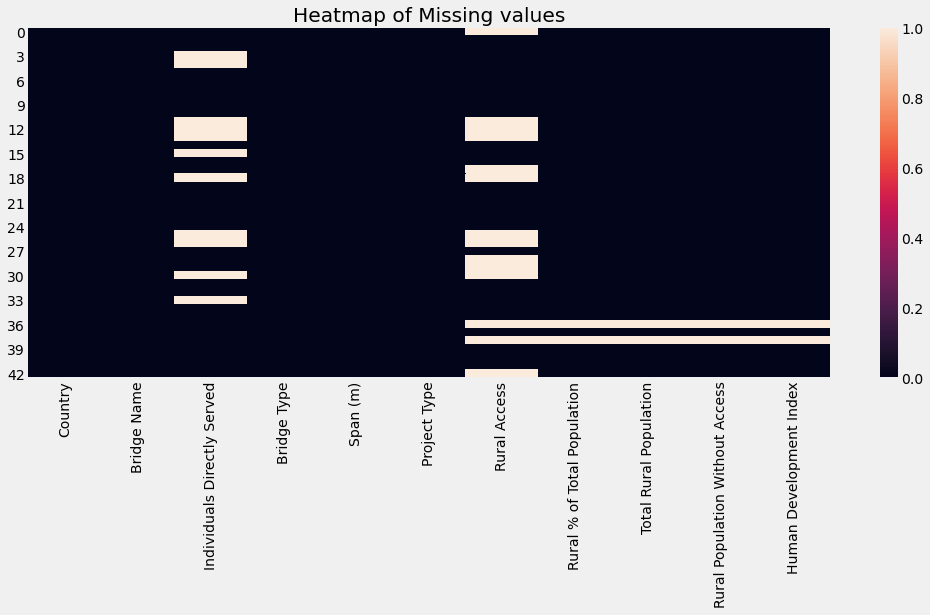

In [39]:
sns.heatmap(new_data.isnull(), cbar = True).set_title("Heatmap of Missing values")
plt.gcf().set_size_inches(16,6)

Count the number of unique records in each column of the resultant dataset

In [40]:
new_data.nunique()

Country                             7
Bridge Name                        43
Individuals Directly Served        26
Bridge Type                         2
Span (m)                           34
Project Type                        2
Rural Access                        3
Rural % of Total Population         6
Total Rural Population              6
Rural Population Without Access     6
Human Development Index             6
dtype: int64

Get the value counts for each country to check the frequency in the dataset

In [41]:
new_data.loc[:,['Country','Human Development Index','Rural % of Total Population']].value_counts(sort = True)

Country    Human Development Index  Rural % of Total Population
Bolivia    0.702842                 0.30575                        11
Nicaragua  0.651104                 0.41478                        10
Rwanda     0.536015                 0.82789                         9
Panama     0.795055                 0.32291                         7
Uganda     0.528191                 0.76226                         3
Haiti      0.502731                 0.44722                         1
dtype: int64

Create a pie-chart to check the percentage of Suspension bridge to the percentage of Suspended bridge

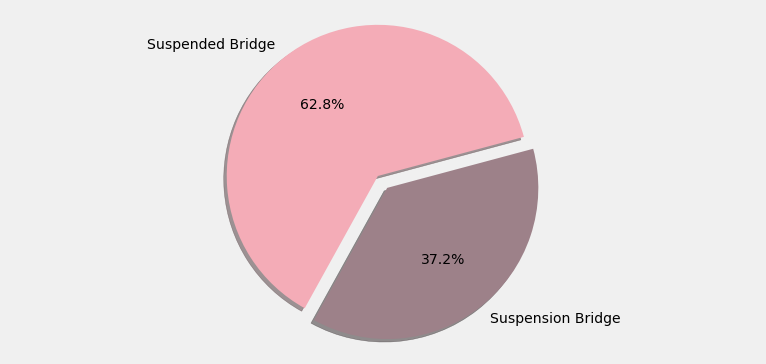

In [42]:
plt.style.use('fivethirtyeight')
myexplode = (0.0, 0.1)
Y = new_data['Bridge Type'].value_counts()
colors = ["#f4acb7","#9d8189"]
mylabel = ['Suspended Bridge', 'Suspension Bridge']
plt.pie(Y, labels = mylabel, autopct = "%1.1f%%", startangle = 15, shadow = True, explode = myexplode, colors = colors)
plt.axis("equal")
plt.gcf().set_size_inches(12,6)
plt.show()

Create a pie-chart to depict the percentage of B2P built and the B2P supported projects. B2P supported projects are incorporated with the assistance of local/state governments or independent organizations providing financial or labour support

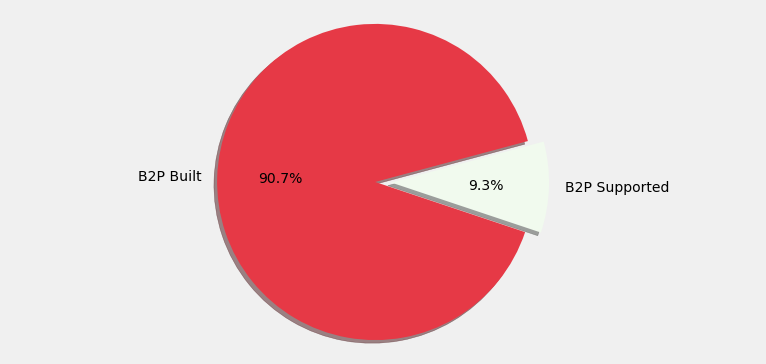

In [43]:
plt.style.use('fivethirtyeight')
myexplode = (0.0, 0.1)
Y = new_data['Project Type'].value_counts()
colors = ['#E63946', '#F1FAEE']
mylabel = ['B2P Built', 'B2P Supported']
plt.pie(Y, labels = mylabel, autopct = "%1.1f%%", startangle = 15, shadow = True, explode = myexplode, colors = colors)
plt.axis("equal")
plt.gcf().set_size_inches(12,6)
plt.show()

In [44]:
new_data

,Country,Bridge Name,Individuals Directly Served,Bridge Type,Span (m),Project Type,Rural Access,Rural % of Total Population,Total Rural Population,Rural Population Without Access,Human Development Index
0,Uganda,Kama,5280.0,Suspended Bridge,90.0,B2P Built,NaN,0.76226,32566140.0,1.527352e+07,0.528191
1,Nicaragua,Puente San Vicente N°1,4000.0,Suspension Bridge,67.8,B2P Built,0.28,0.41478,2681765.0,1.930871e+06,0.651104
2,Nicaragua,La Guitarrilla,4000.0,Suspension Bridge,77.5,B2P Built,0.28,0.41478,2681765.0,1.930871e+06,0.651104
3,Panama,Alto Saldaña,NaN,Suspended Bridge,72.0,B2P Supported,0.77,0.32291,1348754.0,3.102134e+05,0.795055
4,Panama,Banacito,NaN,Suspension Bridge,106.0,B2P Built,0.77,0.32291,1348754.0,3.102134e+05,0.795055
5,Panama,El Paredón,1400.0,Suspension Bridge,35.0,B2P Built,0.77,0.32291,1348754.0,3.102134e+05,0.795055
6,Nicaragua,Los Cerrones #4,5000.0,Suspension Bridge,52.0,B2P Built,0.28,0.41478,2681765.0,1.930871e+06,0.651104
7,Bolivia,Machacamarca,2400.0,Suspended Bridge,53.0,B2P Built,0.48,0.30575,3471223.0,1.805036e+06,0.702842
8,Bolivia,Misión Mayu,700.0,Suspended Bridge,90.0,B2P Built,0.48,0.30575,3471223.0,1.805036e+06,0.702842
9,Bolivia,Capaina,175.0,Suspended Bridge,40.0,B2P Built,0.48,0.30575,3471223.0,1.805036e+06,0.702842


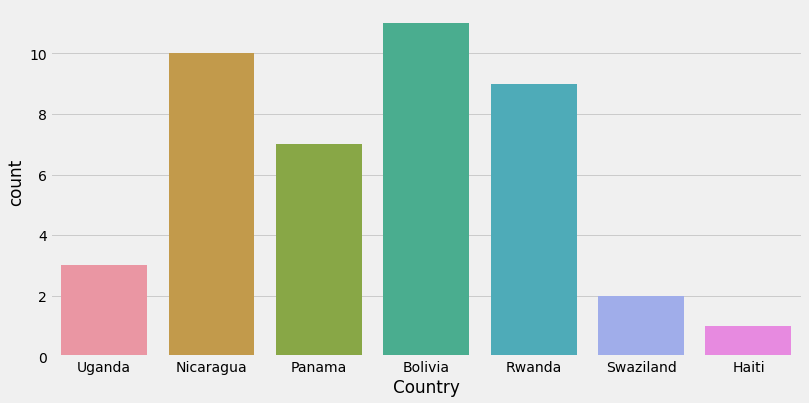

In [45]:
plt.style.use('fivethirtyeight')
ax= sns.countplot(data = new_data, x="Country")
plt.gcf().set_size_inches(12,6)
plt.show()

Create a bar chart to show the number of projects countrywise in descending order

Create a co-relation matrix to compare the correlation between different variables in further predictions or model building

<AxesSubplot:>

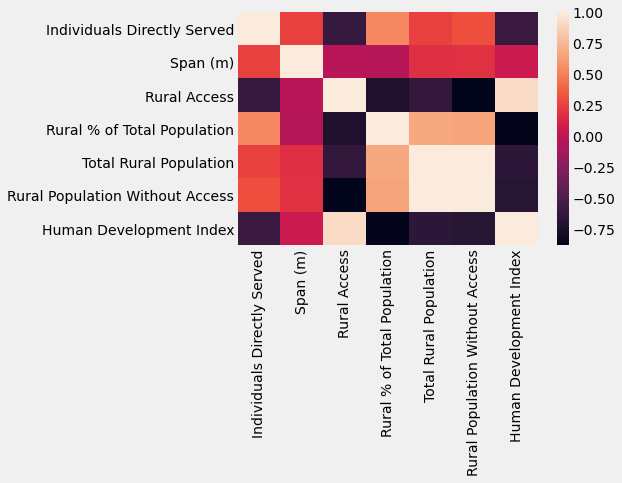

In [48]:
sns.heatmap(new_data.corr())

In [46]:
column1=new_data['Human Development Index']
column2=new_data['Rural % of Total Population']
column1.corr(column2)

-0.8712781510231712

## 4. Conclusion

After performing exploratory data analysis, cleansing and data munging, we depict various statistics related to bridges constructed by the Bridges to Prosperity organization in different countries in 2018. We observe that the bridges have been constructed in under-developed or developing countries to facilitate growth and provide accessibility to people living in rural areas. The proportion of population living in rural areas in these countries is high as compared to the expected standard values, which is inversely linked to the Human development index (HDI) with a correlation coefficient of -0.87. Also, the variables such as individuals served, span of bridges, and other factors are analyzed in details to provide the necessary statistics and key metrics.